In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the inbuilt datset from sklearn
from sklearn.datasets import load_iris

In [3]:
#load the dataset into a dataframe
iris=load_iris()

In [4]:
df_iris=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target']=iris.target

## Data Wrangling

In [5]:
#check the first 5 values
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
#check for null values
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
#check the description of data
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
#check the data type of the df
df_iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

## EDA

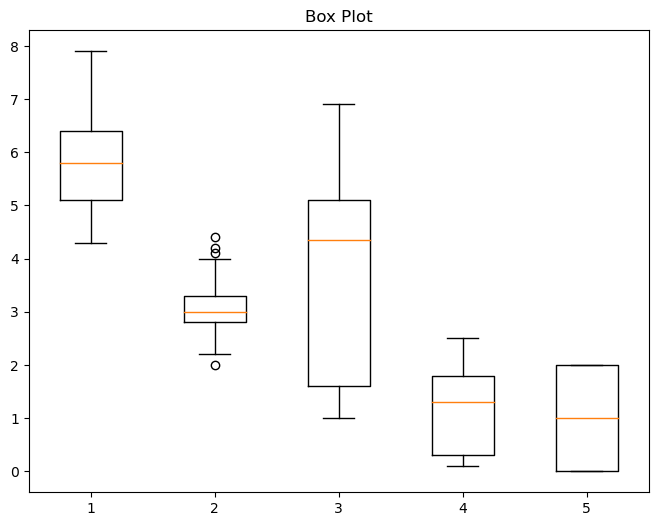

In [9]:
#check for outliers in the dataset
plt.figure(figsize=(8,6))
plt.boxplot(df_iris)
plt.title('Box Plot')
plt.show()

In [10]:
#we will define a function to find the outliers
def find_outilers(df,col):
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    iqr=q3-q1
    min_r=q1 -1.5*iqr
    max_r=q3+1.5*iqr
    outlier_indices=df.index[(df[col]<min_r) | (df[col]>max_r)]
    return outlier_indices

In [11]:
#find outlier rows in column='sepal width (cm)'
find_outilers(df_iris,'sepal width (cm)')

Int64Index([15, 32, 33, 60], dtype='int64')

In [12]:
#drop the rows
df_iris.drop([15,32,33,60], axis=0, inplace=True)

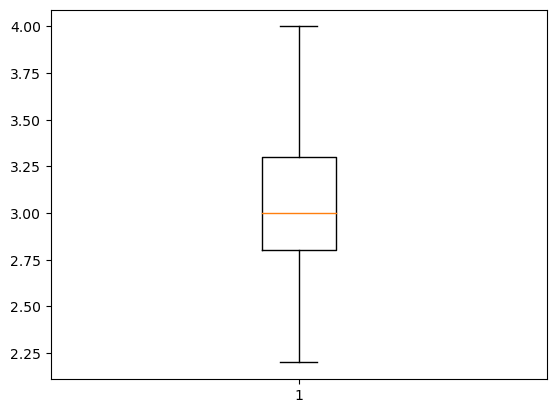

In [13]:
#check for outliers again
plt.boxplot(df_iris['sepal width (cm)'])
plt.show()

## Data Pre-processing

In [14]:
x_features=df_iris.drop(['target'], axis=1)

In [15]:
y_label=df_iris['target']

In [16]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [17]:
scaled_data=scale.fit_transform(x_features)

In [18]:
x_features_scaled=pd.DataFrame(data=scaled_data,columns=x_features.columns)

In [19]:
x_features_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.910515,1.159151,-1.373764,-1.348525
1,-1.151122,-0.101922,-1.373764,-1.348525
2,-1.391729,0.402507,-1.430841,-1.348525
3,-1.512032,0.150292,-1.316687,-1.348525
4,-1.030819,1.411365,-1.373764,-1.348525


In [20]:
#cross validation of data
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_features_scaled,y_label,test_size=.2,random_state=1)

## Creating the model

### We have a number of options
    *Logistic Regression
    *SVM
    *Random Forest
    *XG Boost
    *Naive Bayes
  
 However, we will try to work with the SVM model here

In [22]:
#import Supoort Vector Machine Classifier Model from Sk-learn
from sklearn.svm import SVC

In [23]:
model_svc=SVC()

In [24]:
#train the model
model_svc.fit(x_train,y_train)

SVC()

In [25]:
#predict the test dataset
y_pred=model_svc.predict(x_test)

## Evaluation of Model

In [26]:
#import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [27]:
#check the score of the model
score=accuracy_score(y_test,y_pred)
print(score)

0.9333333333333333


In [28]:
#create a confusin matrix for better visibility
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 10]])

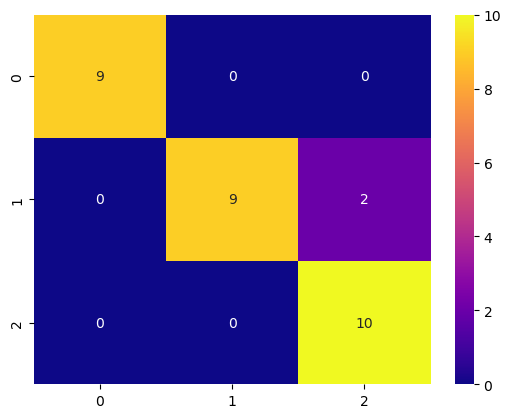

In [29]:
#create a heatmap of the confusion matrix for better visualization
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='plasma', fmt='0.0f')
plt.show()

In [31]:
#check precision, recall and f1 score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.82      0.90        11
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

